In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
file_path = "clustering_მონაცემები.xlsx"
df = pd.read_excel(file_path)

df.head()


,ID,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%)
0,1,25,15,120,25,5
1,2,45,8,450,15,2
2,3,32,22,85,35,8
3,4,28,18,95,30,6
4,5,52,5,520,10,1


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ID                        50 non-null     int64
 1   ასაკი                     50 non-null     int64
 2   შესყიდვების_რაოდენობა     50 non-null     int64
 3   საშუალო_ჩეკი(₾)           50 non-null     int64
 4   საიტზე_დახარჯული_დრო(წთ)  50 non-null     int64
 5   დაბრუნების_სიხშირე(%)     50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB


,ID,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%)
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,36.120000,13.300000,259.860000,22.140000,4.320000
std,14.57738,8.966241,5.418223,172.342801,8.334854,2.316225
min,1.00000,24.000000,4.000000,84.000000,9.000000,1.000000
25%,13.25000,28.250000,8.250000,95.250000,14.250000,2.000000
50%,25.50000,34.000000,13.500000,195.000000,22.500000,4.500000
75%,37.75000,44.750000,18.000000,447.500000,30.000000,6.000000
max,50.00000,53.000000,22.000000,530.000000,35.000000,8.000000


In [4]:
X = df.drop(columns=["ID"])


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[-1.2527989 ,  0.31694141, -0.81976116,  0.34662109,  0.29656175],
       [ 1.00043653, -0.98811147,  1.11446723, -0.86534076, -1.01179893],
       [-0.4641665 ,  1.62199429, -1.0249066 ,  1.55858294,  1.60492243],
       [-0.91481359,  0.87624979, -0.96629361,  0.95260202,  0.73268198],
       [ 1.78906893, -1.54741984,  1.5247581 , -1.47132169, -1.44791915]])

In [6]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

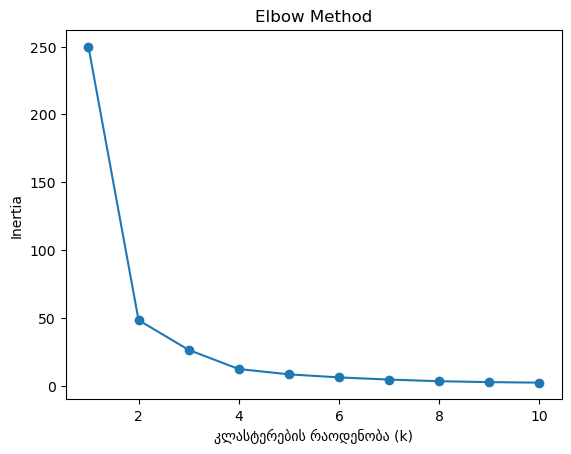

In [7]:
plt.figure()
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("კლასტერების რაოდენობა (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ID,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%),Cluster
0,1,25,15,120,25,5,1
1,2,45,8,450,15,2,0
2,3,32,22,85,35,8,1
3,4,28,18,95,30,6,1
4,5,52,5,520,10,1,0


In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


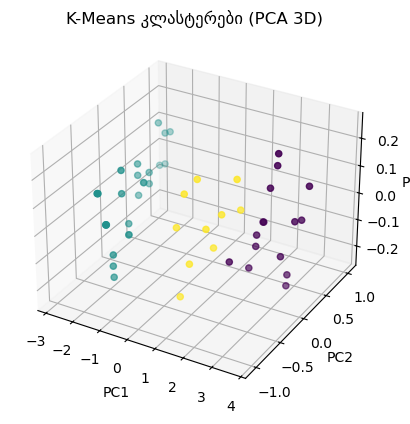

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=clusters
)

ax.set_title("K-Means კლასტერები (PCA 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [11]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,ID,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%)
Cluster,,,,,,
0,22.80,47.666667,6.866667,478.00,12.133333,1.60
1,25.24,28.480000,18.080000,99.12,29.600000,6.36
2,30.20,37.900000,11.000000,334.50,18.500000,3.30


In [12]:
silhouette = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

silhouette, davies_bouldin


(np.float64(0.6107536260708227), np.float64(0.5078450224890659))

In [14]:
#  ინტერპრეტაცია – მომხმარებელთა სეგმენტაცია

##  ოპტიმალური კლასტერების რაოდენობა
Elbow Method-ის მიხედვით ინერციის მკვეთრი შემცირება შეინიშნება **k = 3** კლასტერამდე, რის შემდეგაც გაუმჯობესება ნელდება.  
ამიტომ, **ოპტიმალური კლასტერების რაოდენობა არის 3**, რაც საშუალებას იძლევა მომხმარებლების ქცევა იყოს მკაფიოდ და ლოგიკურად დაყოფილი.

---

##  კლასტერი 0 – აქტიური, ფასზე ორიენტირებული მომხმარებლები
**მომხმარებლის ტიპი:** ხშირი მყიდველები დაბალი დანახარჯით  

**დამახასიათებელი თვისებები:**
- შესყიდვების მაღალი რაოდენობა  
- დაბალი ან საშუალო საშუალო ჩეკი  
- საიტზე გატარებული დრო მაღალი  
- დაბრუნების სიხშირე საშუალო  

**ინტერპრეტაცია:**  
ეს სეგმენტი წარმოადგენს მომხმარებლებს, რომლებიც აქტიურად იყენებენ ონლაინ მაღაზიას, ხშირად ადარებენ პროდუქტებს და რეაგირებენ ფასდაკლებებსა და აქციებზე.

**მარკეტინგული მიდგომა:**  
ლოიალობის პროგრამები, ფასდაკლებები, bundle-შეთავაზებები.

---

##  კლასტერი 1 – პრემიუმ / მაღალი ღირებულების მომხმარებლები
**მომხმარებლის ტიპი:** იშვიათი, მაგრამ მაღალშემოსავლიანი მომხმარებლები  

**დამახასიათებელი თვისებები:**
- შესყიდვების შედარებით მცირე რაოდენობა  
- ძალიან მაღალი საშუალო ჩეკი  
- დაბრუნების დაბალი სიხშირე  
- საიტზე გატარებული დრო შედარებით მცირე  

**ინტერპრეტაცია:**  
ეს მომხმარებლები მიზანმიმართულად აკეთებენ შესყიდვებს და მზად არიან გადაიხადონ მეტი ხარისხიან პროდუქტებში ან ცნობილ ბრენდებში.

**მარკეტინგული მიდგომა:**  
პერსონალიზებული შეთავაზებები, VIP პროგრამები, ექსკლუზიური პროდუქტები.

---

##  კლასტერი 2 – პასიური / რისკიანი მომხმარებლები
**მომხმარებლის ტიპი:** დაბალი ჩართულობის მქონე მომხმარებლები  

**დამახასიათებელი თვისებები:**
- შესყიდვების დაბალი რაოდენობა  
- დაბალი ან საშუალო საშუალო ჩეკი  
- მაღალი დაბრუნების სიხშირე  
- საიტზე გატარებული მცირე დრო  

**ინტერპრეტაცია:**  
ეს სეგმენტი მოიცავს მომხმარებლებს, რომლებიც ნაკლებად არიან კმაყოფილნი პროდუქციით ან მომსახურებით და ნაკლებად არიან ჩართულნი პლატფორმაში.

**მარკეტინგული მიდგომა:**  
პროდუქტის აღწერების გაუმჯობესება, მომხმარებელთა მხარდაჭერის გაძლიერება, ხარისხის კონტროლი.

---

##  რომელი სეგმენტი აქვს ყველაზე დიდი პოტენციალი ბიზნესისთვის?
###  კლასტერი 1 – პრემიუმ მომხმარებლები

**მიზეზები:**
- ქმნიან ყველაზე მაღალ შემოსავალს თითო მომხმარებელზე  
- აქვთ დაბალი დაბრუნების სიხშირე  
- საჭიროებენ ნაკლებ მარკეტინგულ რესურსს  

ამ სეგმენტზე ფოკუსირება მნიშვნელოვნად ზრდის ბიზნესის მოგებიანობასა და მომხმარებლის სიცოცხლის ციკლის ღირებულებას (CLV).

---

##  დასკვნა
მომხმარებლების სეგმენტაციამ წარმატებით გამოყო **სამი განსხვავებული ქცევითი ჯგუფი**, რაც ქმნის მარკეტინგული კამპანიების პერსონალიზაციის მყარ საფუძველს.  
ყველაზე სტრატეგიულად მნიშვნელოვანი აღმოჩნდა **პრემიუმ მომხმარებლების სეგმენტი**, რომელიც წარმოადგენს ბიზნესის ზრდის ძირითად წყაროს.


SyntaxError: invalid syntax (3800953286.py, line 4)